<a href="https://colab.research.google.com/github/sahilfaizal01/Image-Compression-and-Denoising-using-CNN/blob/main/Denoising_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

# **Loading the Dataset**

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [8]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

# **Adding noise to the images**

In [10]:
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

In [11]:
# clip the values in the range 0 and 1
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

# **EDA**

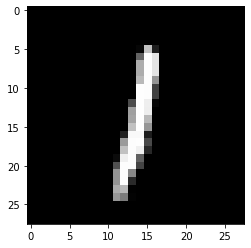

In [12]:
index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

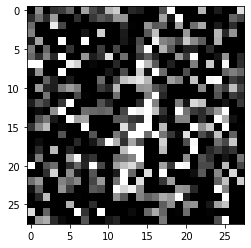

In [13]:
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

# **Model Building**

In [15]:
model = Sequential()
model.add(Conv2D(32,3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,padding='same'))
model.add(Conv2D(16,3,activation='relu',padding='same'))
model.add(MaxPooling2D(2,padding='same'))
model.add(Conv2D(16,3,activation='relu',padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid',padding='same'))
model.compile(optimizer='adam',loss='binary_crossentropy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 16)      

In [16]:
model.fit(x_train_noisy,x_train,epochs=20,batch_size=256,validation_data=(x_test_noisy,x_test))

Epoch 1/20
235/235 [==============================] - 11s 12ms/step - loss: 0.2332 - val_loss: 0.1491
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1420 - val_loss: 0.1343
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1326 - val_loss: 0.1280
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1279 - val_loss: 0.1245
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1250 - val_loss: 0.1223
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1232 - val_loss: 0.1208
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1218 - val_loss: 0.1200
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1206 - val_loss: 0.1186
Epoch 9/20
235/235 [==============================] - 2s 11ms/step - loss: 0.1197 - val_loss: 0.1177
Epoch 10/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1189 - val_l

# **Model Evaluation**

In [22]:
pred = model.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


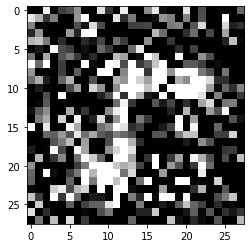

In [23]:
index = np.random.randint(len(x_test))
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

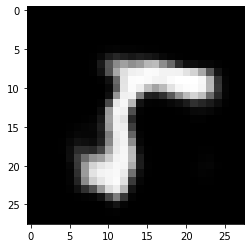

In [24]:
plt.imshow(pred[index].reshape(28,28))
plt.gray()

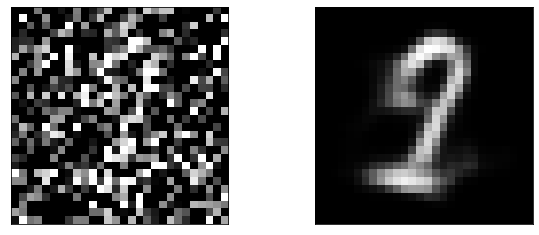

In [25]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10,4))
ax = plt.subplot(1,2,1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1,2,2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
